In [166]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import files
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
uploaded = files.upload()

Saving bank.csv to bank (3).csv


In [167]:
Data = pd.read_csv("bank.csv")

In [168]:
Data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [169]:
Data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [170]:
Data.shape

(10000, 14)

In [171]:
 Data.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...            

In [172]:
Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [173]:
pd.isnull(Data).count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [174]:
Data.corr(method='kendall')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.002767,0.003416,0.000351,-0.004838,-0.006304,0.006663,0.000489,0.009835,-0.003990,-0.013531
CustomerId,0.002767,1.000000,0.003967,0.005958,-0.010483,-0.009763,0.015528,-0.011451,0.001373,0.010188,-0.005115
CreditScore,0.003416,0.003967,1.000000,-0.005414,0.000791,0.004034,0.010118,-0.003110,0.019844,0.000807,-0.019049
Age,0.000351,0.005958,-0.005414,1.000000,-0.007424,0.023611,-0.047761,-0.012666,0.033027,-0.001571,0.268573
Tenure,-0.004838,-0.010483,0.000791,-0.007424,1.000000,-0.007016,0.010866,0.019107,-0.024508,0.005423,-0.011947
Balance,-0.006304,-0.009763,0.004034,0.023611,-0.007016,1.000000,-0.266748,-0.008407,-0.009828,0.008200,0.094983
NumOfProducts,0.006663,0.015528,0.010118,-0.047761,0.010866,-0.266748,1.000000,0.003802,0.016051,0.010130,-0.123434
HasCrCard,0.000489,-0.011451,-0.003110,-0.012666,0.019107,-0.008407,0.003802,1.000000,-0.011866,-0.008199,-0.007138
IsActiveMember,0.009835,0.001373,0.019844,0.033027,-0.024508,-0.009828,0.016051,-0.011866,1.000000,-0.009365,-0.156128
EstimatedSalary,-0.003990,0.010188,0.000807,-0.001571,0.005423,0.008200,0.010130,-0.008199,-0.009365,1.000000,0.009864


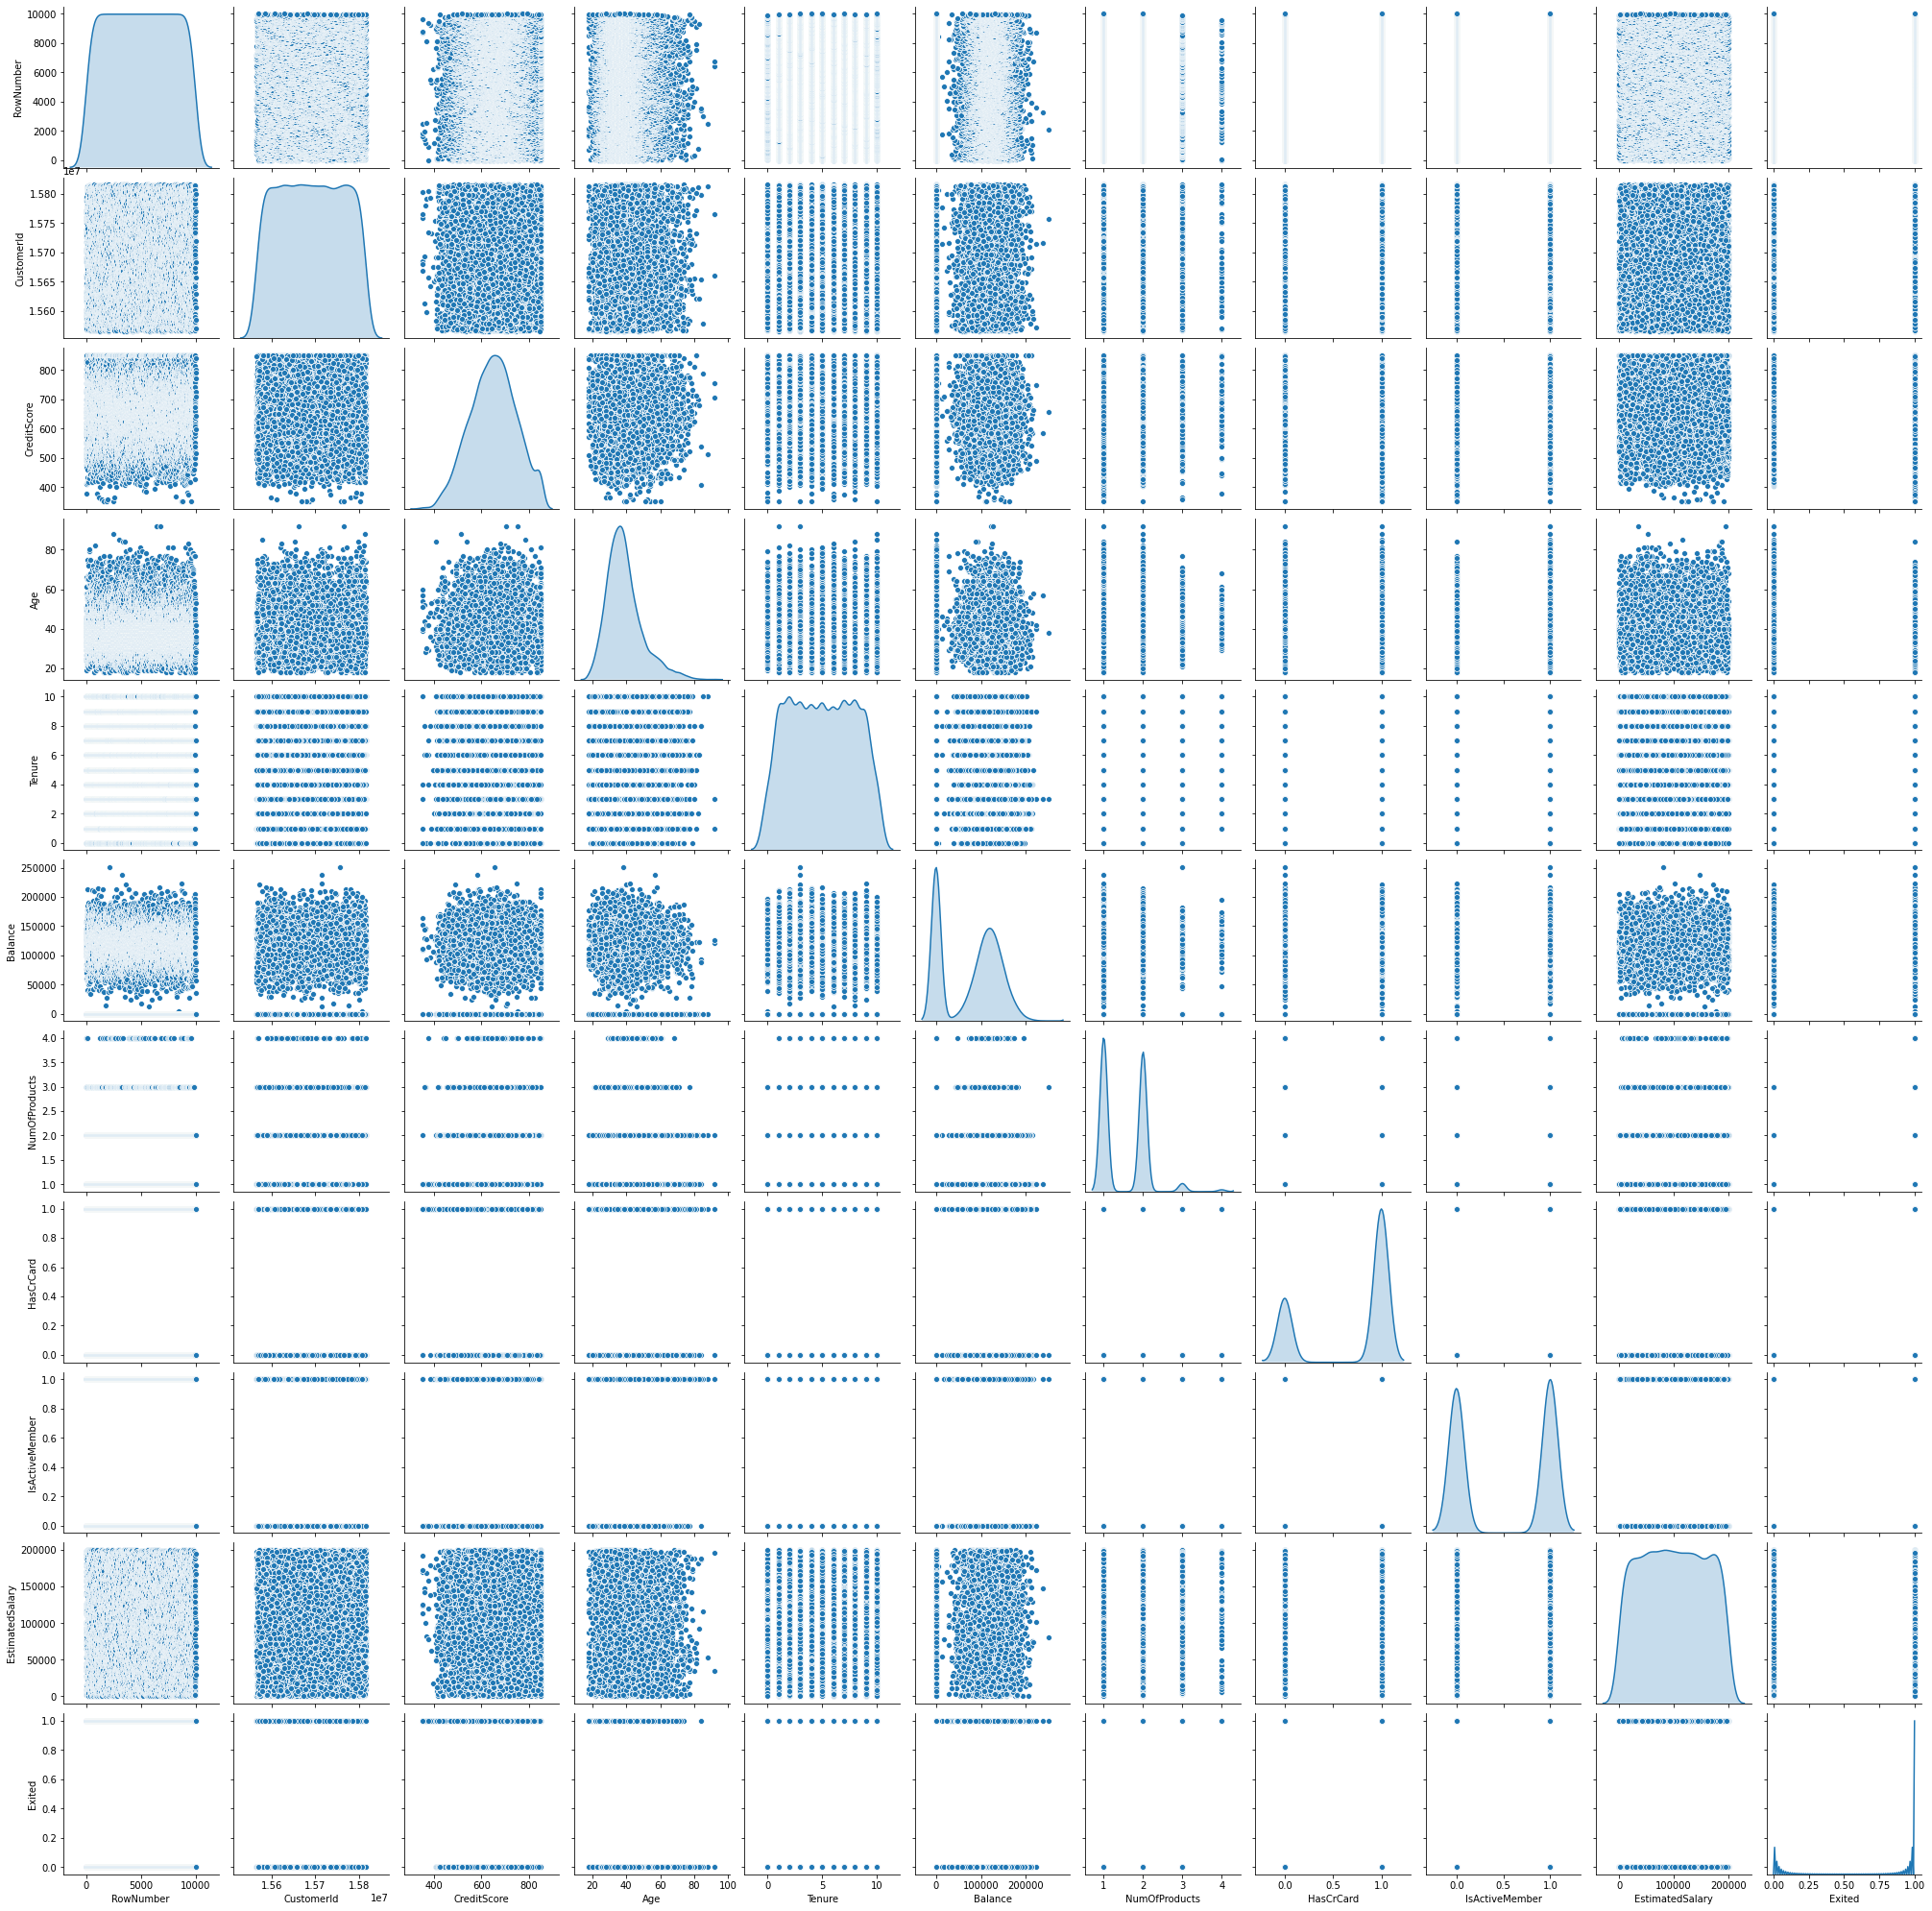

In [175]:
sns.pairplot(Data,diag_kind='kde')

In [176]:
Data_new = Data.drop(['RowNumber'], axis =1)
Data_new.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [177]:
Data_new.corr(method='kendall')

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.003967,0.005958,-0.010483,-0.009763,0.015528,-0.011451,0.001373,0.010188,-0.005115
CreditScore,0.003967,1.000000,-0.005414,0.000791,0.004034,0.010118,-0.003110,0.019844,0.000807,-0.019049
Age,0.005958,-0.005414,1.000000,-0.007424,0.023611,-0.047761,-0.012666,0.033027,-0.001571,0.268573
Tenure,-0.010483,0.000791,-0.007424,1.000000,-0.007016,0.010866,0.019107,-0.024508,0.005423,-0.011947
Balance,-0.009763,0.004034,0.023611,-0.007016,1.000000,-0.266748,-0.008407,-0.009828,0.008200,0.094983
NumOfProducts,0.015528,0.010118,-0.047761,0.010866,-0.266748,1.000000,0.003802,0.016051,0.010130,-0.123434
HasCrCard,-0.011451,-0.003110,-0.012666,0.019107,-0.008407,0.003802,1.000000,-0.011866,-0.008199,-0.007138
IsActiveMember,0.001373,0.019844,0.033027,-0.024508,-0.009828,0.016051,-0.011866,1.000000,-0.009365,-0.156128
EstimatedSalary,0.010188,0.000807,-0.001571,0.005423,0.008200,0.010130,-0.008199,-0.009365,1.000000,0.009864
Exited,-0.005115,-0.019049,0.268573,-0.011947,0.094983,-0.123434,-0.007138,-0.156128,0.009864,1.000000


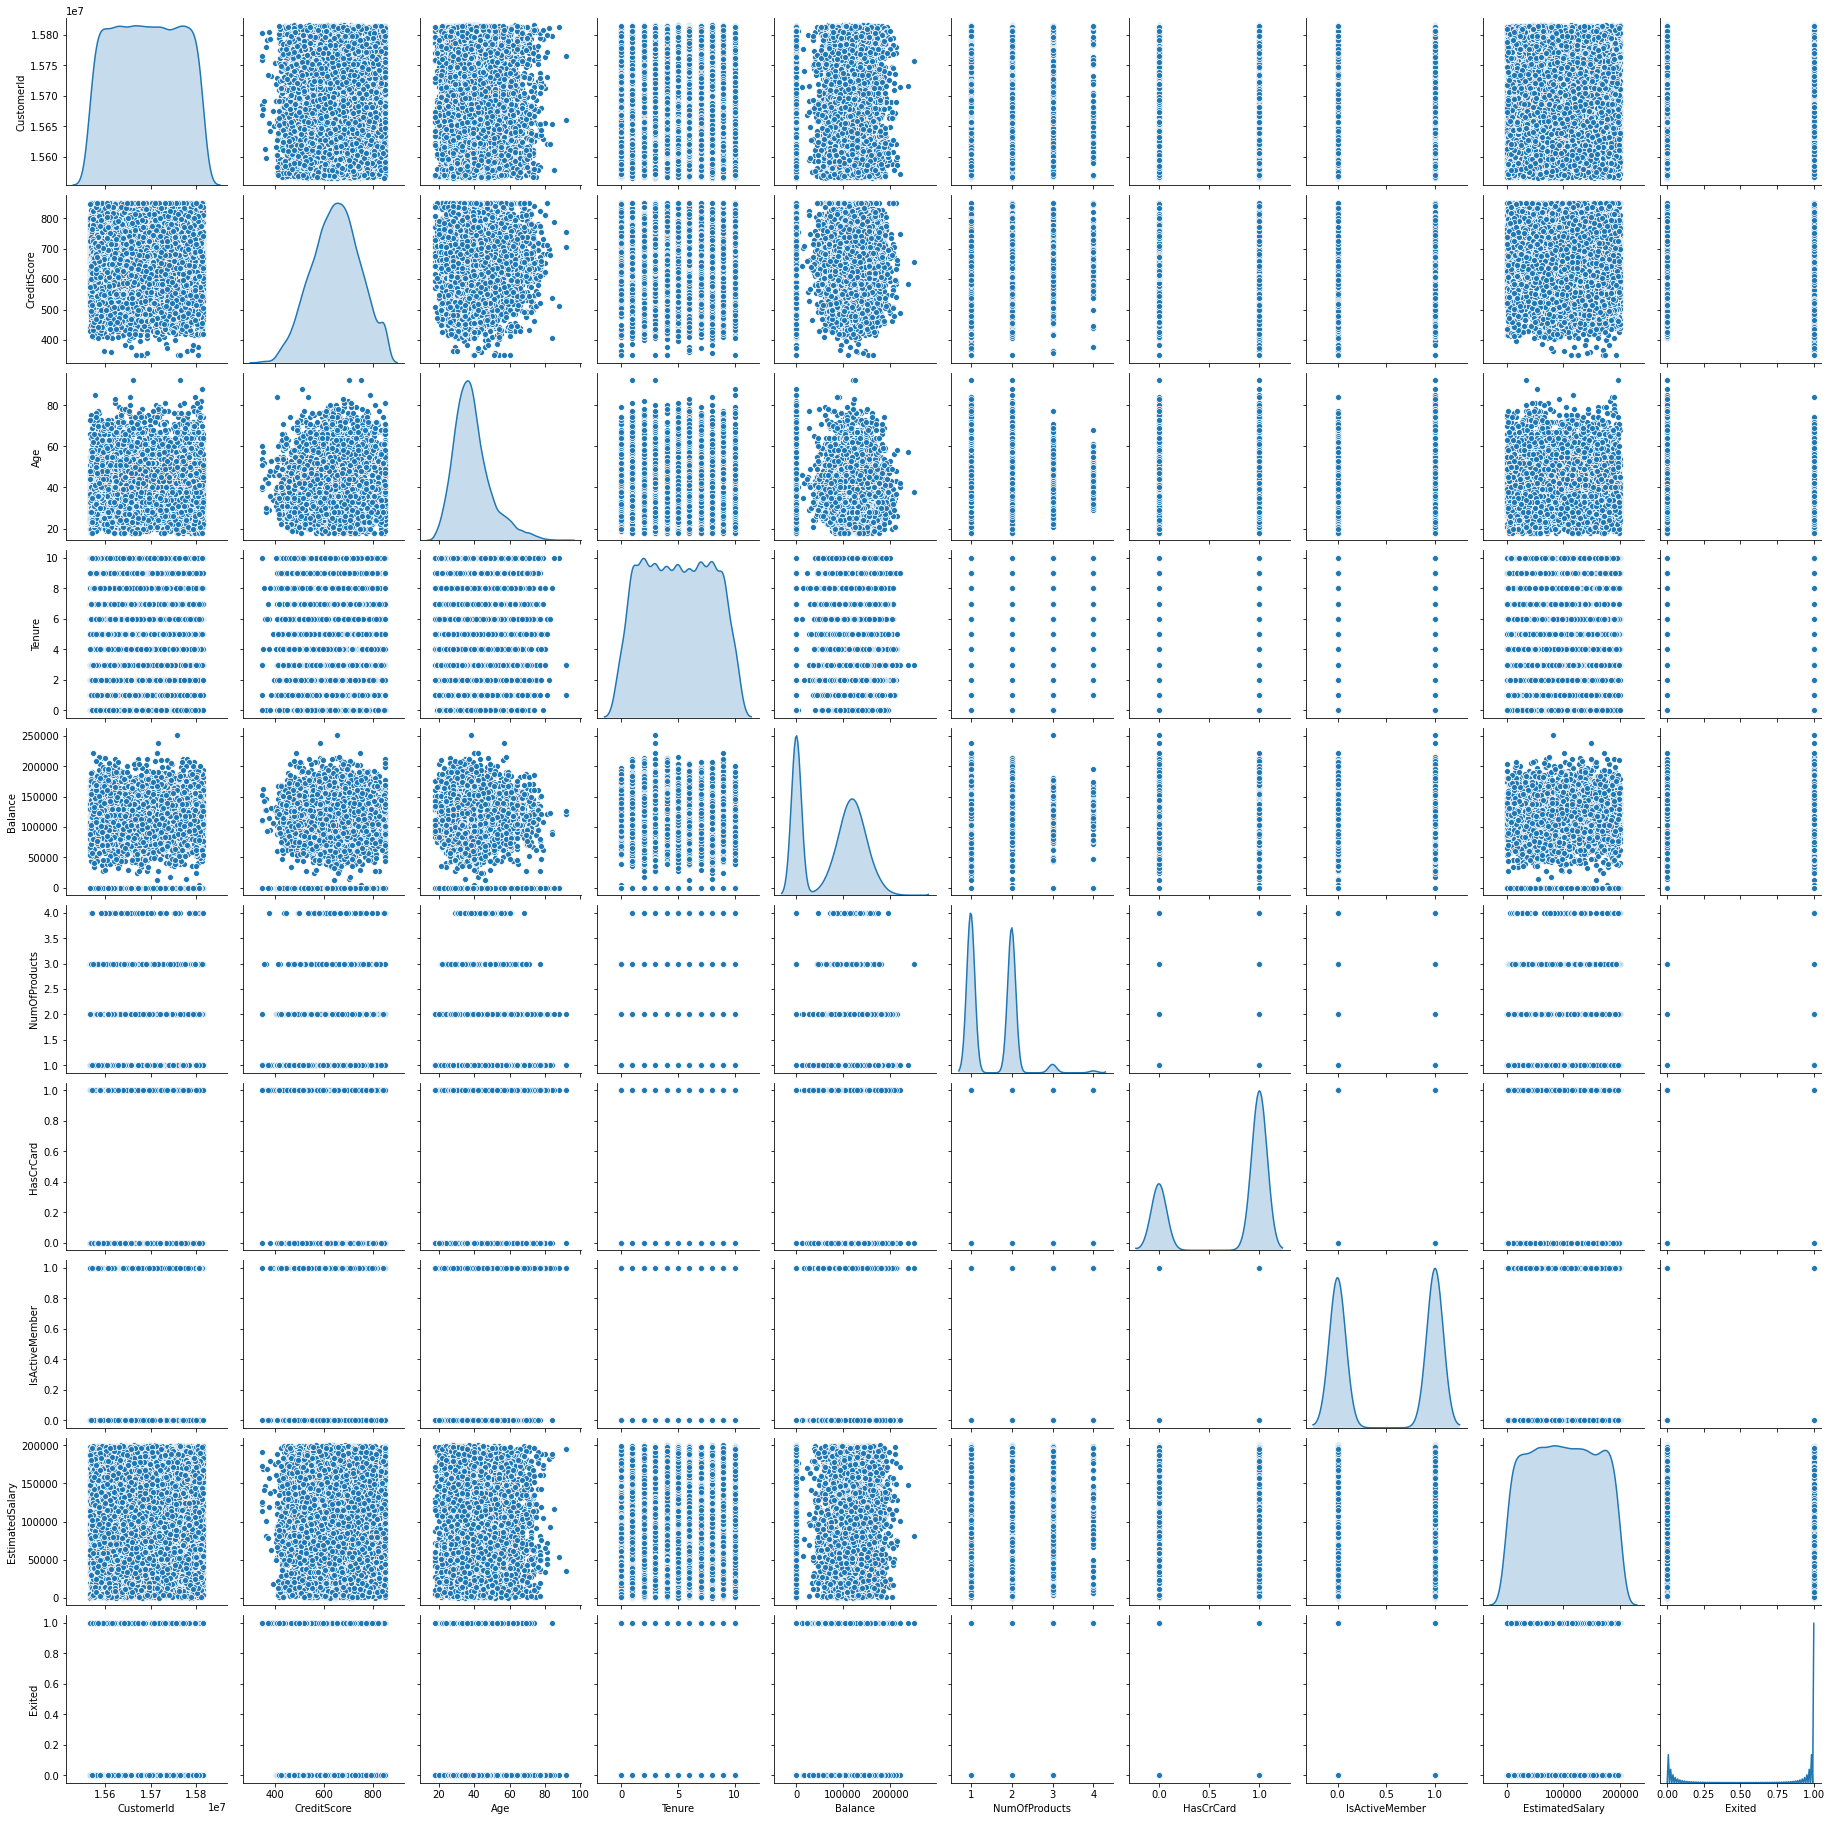

In [178]:
sns.pairplot(Data_new,diag_kind='kde')

In [179]:
Data_new.groupby(Data_new["NumOfProducts"]).mean()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
NumOfProducts,,,,,,,,,
1,1.568963e+07,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,1.569211e+07,652.188671,37.753595,5.051852,51879.145813,0.707190,0.532898,100452.012821,0.075817
3,1.569908e+07,648.105263,43.195489,5.003759,75458.328195,0.714286,0.424812,104318.130564,0.827068
4,1.567663e+07,653.583333,45.683333,5.300000,93733.135000,0.683333,0.483333,104763.723333,1.000000


In [180]:
Data_clean = Data_new.drop(['Gender', 'Geography', 'Surname'], axis =1)
y = Data_clean.NumOfProducts
X_train, X_test, y_train, y_test = train_test_split(Data_clean, y, test_size=0.3,random_state=42)
y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [181]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

Deep Learning Model

In [182]:
ncols = X_train.shape[0]
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

# second hidden layer
#model.add(Dense(10, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model.add(Dense(1))

In [183]:
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

# second hidden layer
#model.add(Dense(10, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model.add(Dense(1))

In [184]:
optimizer = tf.keras.optimizers.Adam(0.01)


model.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse'])
                   

epochs = 50

In [185]:
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)


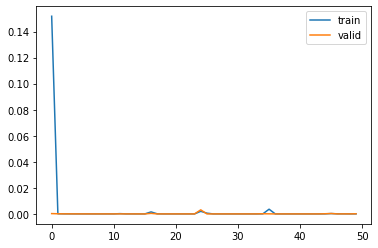

In [186]:
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

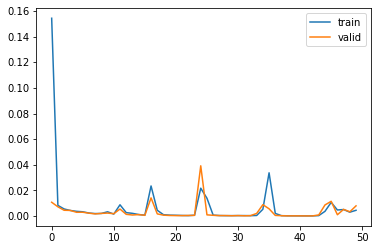

In [187]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)

In [188]:
loss = model.evaluate(X_test, y_test, verbose=False)

In [189]:
y_pred = np.round(model.predict(X_test))

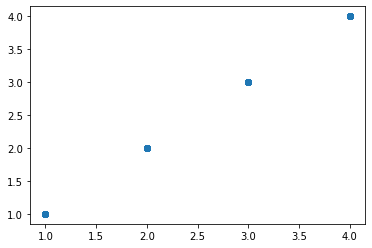

In [190]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

MNIST

In [191]:
from tensorflow import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [192]:
model = Sequential()

In [193]:
model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [194]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [195]:
model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10
28/28 [==============================] - 0s 6ms/step - loss: 0.7069 - accuracy: 0.8896
Epoch 2/10
28/28 [==============================] - 0s 7ms/step - loss: 0.1169 - accuracy: 0.9759
Epoch 3/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0617 - accuracy: 0.9880
Epoch 4/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9903
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0148 - accuracy: 0.9956
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9980
Epoch 8/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9991
Epoch 9/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9996
Epoch 10/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 0.9999


In [196]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.998
Loss: 0.006


In [197]:
y_predict = model.predict(X_test)

In [198]:
y_predict[0]

array([2.9298799e-05, 6.2915473e-04, 9.9770564e-01, 1.3883861e-03,
       7.3241798e-05, 4.8513306e-05, 8.2035876e-06, 4.8873520e-05,
       5.5995355e-05, 1.2747851e-05], dtype=float32)

In [199]:
np.argmax(y_predict[0])

2

In [200]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
rounded_test=np.argmax(y_test, axis=1)
rounded_test[1]
cm = metrics.confusion_matrix(rounded_test,y_pred,labels=[1, 0])
print(cm)

[[1488    0]
 [   0    0]]


In [201]:
cr=metrics.classification_report(rounded_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1488
           2       1.00      1.00      1.00      1412
           3       0.94      0.99      0.96        80
           4       1.00      0.75      0.86        20

    accuracy                           1.00      3000
   macro avg       0.98      0.93      0.96      3000
weighted avg       1.00      1.00      1.00      3000



I think I need to do separate sections for each model

In [202]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 10)
(3000, 10)
(7000, 10)
(3000, 10)


In [203]:
from sklearn import preprocessing
X_test = preprocessing.normalize(X_train)

In [204]:
results = model.evaluate(X_train, X_train)

219/219 [==============================] - 0s 1ms/step - loss: 2.6947 - accuracy: 0.0833


In [205]:
def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions))

In [206]:
input_dim = X_train.shape[1]
output_dim = 1
learning_rate = 0.01

# Let us initialize the weights and bias variables. 
weights = tf.Variable(tf.zeros(shape=(input_dim, output_dim), dtype= tf.float32))
bias = tf.Variable(tf.ones(shape=(output_dim,), dtype= tf.float32))

test_predictions = tf.matmul(X_test.astype('float32'), weights) + bias
print(compute_loss(test_predictions, test_predictions))

tf.Tensor(0.0, shape=(), dtype=float32)


Regression


In [207]:
def funct(x,w): # function
    f = w[2]*x*x + w[1]*x + w[0] # Parabola
    return f

def grad_funct(x,w): # gradient
    grad_f = 2*w[2]*x + w[1]
    return grad_f

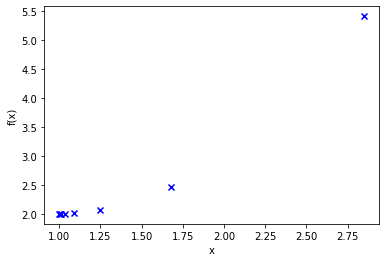

In [208]:
w = np.array([3, -2, 1]) # Actual weights
x = 6 # Some guess
learning_rate = 0.005
min_abs_change = 1e-5
max_iter = 1000

x_series = [x]

iterations = 1
while True:
    f = funct(x,w)
    grad_f = grad_funct(x,w)
    x_new = x - learning_rate * grad_f
    
    # Stopping Condition
    if np.sum(abs(x_new - x)) < min_abs_change:
        break
    if iterations > max_iter:
        break
    
    if iterations % (max_iter/10) == 0:
        # Plot data
        plt.scatter(x, f, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x)")
    
    iterations += 1
    x = x_new
    
    x_series = np.concatenate((x_series,[x]))

In [209]:
x_series

array([6.        , 5.95      , 5.9005    , 5.851495  , 5.80298005,
       5.75495025, 5.70740075, 5.66032674, 5.61372347, 5.56758624,
       5.52191038, 5.47669127, 5.43192436, 5.38760511, 5.34372906,
       5.30029177, 5.25728886, 5.21471597, 5.17256881, 5.13084312,
       5.08953469, 5.04863934, 5.00815295, 4.96807142, 4.9283907 ,
       4.8891068 , 4.85021573, 4.81171357, 4.77359644, 4.73586047,
       4.69850187, 4.66151685, 4.62490168, 4.58865266, 4.55276614,
       4.51723847, 4.48206609, 4.44724543, 4.41277298, 4.37864525,
       4.34485879, 4.3114102 , 4.2782961 , 4.24551314, 4.21305801,
       4.18092743, 4.14911816, 4.11762697, 4.0864507 , 4.0555862 ,
       4.02503034, 3.99478003, 3.96483223, 3.93518391, 3.90583207,
       3.87677375, 3.84800601, 3.81952595, 3.79133069, 3.76341739,
       3.73578321, 3.70842538, 3.68134113, 3.65452771, 3.62798244,
       3.60170261, 3.57568559, 3.54992873, 3.52442944, 3.49918515,
       3.4741933 , 3.44945137, 3.42495685, 3.40070728, 3.37670

In [210]:
iterations

849

In [211]:
x = 6 # Some guess
alpha = 0.1
beta1 = 0.9
beta2 = 0.9
min_abs_change = 1e-4
max_iter = 1000
m = 0*x
v = 0*x
epsilon = 10e-8

x_series = [x]

iterations = 1
while True:
    f = funct(x,w)
    grad_f = grad_funct(x,w)
    m = beta1 * m + (1-beta1) * grad_f
    v = beta2 * v + (1-beta2) * grad_f * grad_f
    m_hat = m / (1-np.power(beta1,iterations))
    v_hat = v / (1-np.power(beta2,iterations))
    x_new = x - alpha * m_hat / np.sqrt(v_hat + epsilon)
    
    # Stopping Condition
    if np.sum(abs(x_new - x)) < min_abs_change:
        break
    if iterations > max_iter:
        break
    
    if iterations % (max_iter/2) == 0:
        # Plot data
        plt.scatter(x, f, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x)")
    
    iterations += 1
    x = x_new
    
    x_series = np.concatenate((x_series,[x]))

In [212]:
x_series

array([6.        , 5.9       , 5.80000509, 5.70001893, 5.60004539,
       5.50008851, 5.40015257, 5.30024207, 5.20036171, 5.10051644,
       5.00071145, 4.90095218, 4.80124438, 4.70159405, 4.60200756,
       4.50249158, 4.4030532 , 4.30369992, 4.2044397 , 4.10528103,
       4.00623298, 3.90730525, 3.80850828, 3.70985333, 3.61135259,
       3.51301928, 3.41486781, 3.31691395, 3.219175  , 3.12167   ,
       3.02441998, 2.92744828, 2.83078084, 2.73444664, 2.63847809,
       2.54291165, 2.44778836, 2.35315464, 2.25906311, 2.16557363,
       2.07275442, 1.9806835 , 1.88945028, 1.79915746, 1.70992321,
       1.62188368, 1.53519591, 1.45004097, 1.36662755, 1.28519563,
       1.20602021, 1.1294147 , 1.05573345, 0.98537283, 0.91876973,
       0.85639647, 0.79875107, 0.74634187, 0.6996663 , 0.65918489,
       0.62529261, 0.59829123, 0.57836682, 0.56557603, 0.55984317,
       0.56096773, 0.5686402 , 0.58246237, 0.60196857, 0.62664467,
       0.65594281, 0.68929085, 0.72609639, 0.76574557, 0.80759

In [213]:
iterations

362

In [214]:
results = model.evaluate(X_train, X_train)

219/219 [==============================] - 0s 1ms/step - loss: 2.6947 - accuracy: 0.0833
